### Whole model building pipeline

As you have finished the whole pipeline with machine learning parts, I will really recommend you should use some machine learning algorithms that you could fit with some date sets, as there are so many algorithms that we could use, here I just make really some common algorithms that you should first try out, after you have known how to use the sklearn module to do feature precossing, fit your model, evaluate your model, the refit your model steps, than you should really figure out the most common algorithms that if you face with one problem!

I will also take you with the **explain properties** of the algorithms that you have learned, keep calm, we will step by step!

### Tips

Here what I do is just to make an example if I get the dataset and the step that I will take to make the model done also with my some thoughts during the whole step! You could just follow the steps that I take if you go with one project!

In [1]:
# first import some module
import numpy as np
import pandas as pd
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import os

warnings.simplefilter('ignore')

In [2]:
# here I will just take Titanic dataset as an example, what you need to change is just change the path that your data locates
path = "C:/Users/guangqiiang.lu/Documents/lugq/Kaggle/Titanic"

# load data
train_df = pd.read_csv(os.path.join(path, 'train.csv'))
test_df = pd.read_csv(os.path.join(path, 'test.csv'))

In [3]:
# show what data we have
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
# what data types of each column
# object type is string type!
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# get some information of data like how many, mean, std...
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

Aha, the only difference between the train and test data is that for test data there isn't **survived** columns as we need to predict!

In [7]:
# we have to find out how many nan values in the data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# for test data
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
# as we could see how many values that are nan, I just want to get the nan percentage of each column
nan_df = train_df.isnull().sum() / len(train_df)
nan_df = pd.DataFrame(nan_df, columns=['na'])

nan_df.sort_values(by='na', ascending=False).head()

# so for the data that we have 3 columns that contains nan values as:Cabin, Age, Embarked,
# and for Cabin columns that there are about 77% nan!!!
# with so many nan values in one column, that we don't have to good solution to solve this! 
# so why not just drop the column

na
Cabin        0.771044
Age          0.198653
Embarked     0.002245
PassengerId  0.000000
Survived     0.000000

In [10]:
# as we need to remove the "Cabin" column with train data, we have to do the same with test data!!!
train_df.drop(['Cabin'], axis=1, inplace=True)     # drop that column and replace with original data
test_df.drop(['Cabin'], axis=1, inplace=True)

In [11]:
# we have to check that we have removed that columns
# aha, we have removed that column
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

For now, we still have 2 columns that contains nan values, we have to process it! But how?

There are some common solutions to solve this, like we could impute the nan value with **column mean** or **column median** or **most common values in that column**. But which solution to try is just depend on you!!!

In [12]:
# here I will impute "Age" column with mean of that column and for "Embarked" will be imputed with most common values

train_age_mean = train_df['Age'].mean()

# this is to get the most common values in one column with pandas!!!
# you should get this code one by one to figure out how this is done!
train_embarked_common = train_df['Embarked'].value_counts().sort_values(ascending=False).index[0]

# impute the data just with 'fillna' means fill nan values... we have to set the inplace = True to change original dataframe!
train_df['Age'].fillna(train_age_mean, inplace=True)
test_df['Age'].fillna(train_age_mean, inplace=True)

train_df['Embarked'].fillna(train_embarked_common, inplace=True)
test_df['Embarked'].fillna(train_embarked_common, inplace=True)

In [13]:
# now that we could check whether we have nan values
print("train data nan values: %d" % train_df.isnull().sum().sum())

print("test data nan values: %d" % test_df.isnull().sum().sum())

train data nan values: 0
test data nan values: 1


In [14]:
# as I see that for test data, there is also another column with nan value called "Fare"
# we just impute this nan with mean of train "Fare"!
test_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)

# than you see that we don't have nan value any more!
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

As we don't have any nan value in our data, than what we need to do is the most imortant part: **Feature Enginering**! That is mainly for preprocessing module that we could use to process data!

Do  you remember how to do preprocessing? Here we go!

In [16]:
# 1th step, we don't need the "PassengerId" for train, just remove it
train_df.drop(['PassengerId'], axis=1, inplace=True)

# for test, I have to store the ID, as we need to submit our prediction!
test_id = test_df[["PassengerId"]]

test_df.drop(['PassengerId'], axis=1, inplace=True)

In [17]:
# 2th step, we want to get how many distinct value of some category columns
cate_columns = list(train_df.columns[train_df.dtypes == 'int64'])

for f in cate_columns:
    print("Column '%s' with %d unique values" % (f, len(np.unique(train_df[f]))))
    
# we don't need the "Survived" column as label column, we could just remove it
cate_columns.remove('Survived')

Column 'Survived' with 2 unique values
Column 'Pclass' with 3 unique values
Column 'SibSp' with 7 unique values
Column 'Parch' with 7 unique values


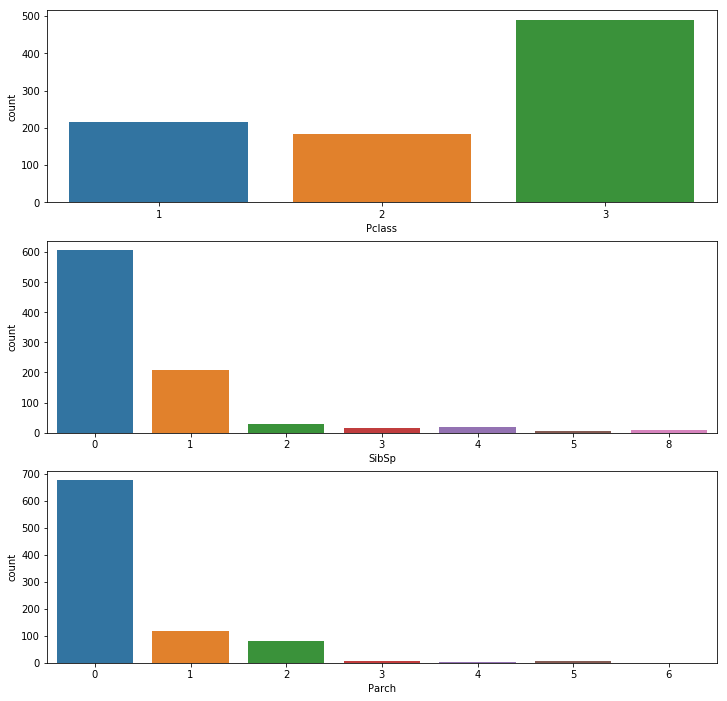

In [18]:
# so we have get idea that for this category features, we could get some insight how they will affect our label

# first we could get how many with each category
fig, ax = plt.subplots(len(cate_columns), 1, figsize=(12, 12))

for i in range(len(cate_columns)):
    sns.countplot(train_df[cate_columns[i]], ax=ax[i])

plt.show()

# we could get the info: For 'Pclass' with 3 are most, for the other that with 0 value are most!

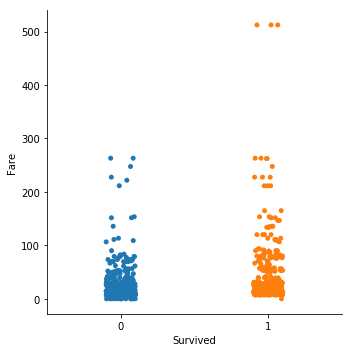

In [19]:
# What price of survived or not!
sns.catplot(x='Survived', y='Fare', data=train_df)

plt.show()

In fact, we could do really really many insight to get insight to data! But here I just focus on the preprocessing step! You could try more with **Seaborn Tutorial**!

In [20]:
train_df.head()

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  
0    male  22.0      1      0         A/5 21171   7.2500        S  
1  female  38.0      1      0          PC 17599  71.2833        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S  
3  female  35.0      1      0            113803  53.1000        S  
4    male  35.0      0      0            373450   8.0500        S

In [21]:
# for Sex and Embarked columns, they are string, we should convert them to numerical type! But how? there are many solutuions, 
# but here I will show you will just make it as number and onehot
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

onehot_cols = ['Sex', 'Embarked']

# label encoder, we have to do the same with test data!
for f in onehot_cols:
    lb = LabelEncoder()
    
    train_df["encoder_" + f] = lb.fit_transform(train_df[f])
    test_df["encoder_" + f] = lb.transform(test_df[f])
    
    # then we could just remove the cateogry features
    train_df.drop(f, axis=1, inplace=True)
    test_df.drop(f, axis=1, inplace=True)
    
train_df.head()
# as you could see that we have added two columns with just convert the string to number

Survived  Pclass                                               Name   Age  \
0         0       3                            Braund, Mr. Owen Harris  22.0   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0   
2         1       3                             Heikkinen, Miss. Laina  26.0   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0   
4         0       3                           Allen, Mr. William Henry  35.0   

   SibSp  Parch            Ticket     Fare  encoder_Sex  encoder_Embarked  
0      1      0         A/5 21171   7.2500            1                 2  
1      1      0          PC 17599  71.2833            0                 0  
2      0      0  STON/O2. 3101282   7.9250            0                 2  
3      1      0            113803  53.1000            0                 2  
4      0      0            373450   8.0500            1                 2

In [22]:
# then if have times that we could really do more with string columns, but for now I just remove the 'Name' and 'Ticket' columns for convenience!
remove_cols = ['Name', 'Ticket']

for f in remove_cols:
    train_df.drop(f, axis=1, inplace=True)
    test_df.drop(f, axis=1, inplace=True)
    
# so that you see that we don't have any strings!
train_df.head()

Survived  Pclass   Age  SibSp  Parch     Fare  encoder_Sex  \
0         0       3  22.0      1      0   7.2500            1   
1         1       1  38.0      1      0  71.2833            0   
2         1       3  26.0      0      0   7.9250            0   
3         1       1  35.0      1      0  53.1000            0   
4         0       3  35.0      0      0   8.0500            1   

   encoder_Embarked  
0                 2  
1                 0  
2                 2  
3                 2  
4                 2

In [23]:
# here I don't do anything, I will just fit the baseline model!
data = train_df.drop('Survived', axis=1)
label = train_df[['Survived']]

In [24]:
# just use cross-validation! as not too much data!
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

base_score = cross_val_score(lr, X=data, y=label, cv=10).mean()

# with just these data with baseline is 79% accuracy! not too bad
print("Baseline score: ", base_score)

Baseline score:  0.7935157757348767


In [25]:
# then for this data, I could use more robust model like random forest 
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# just with 1% improment! not too good...
print("Random Forest score: ", cross_val_score(rfc, X=data, y=label, cv=10).mean())

Random Forest score:  0.8081727386221769


In [26]:
# Here I want to tune the hyper-parameters !
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 500]}

grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10)

grid.fit(data, label)

# you see? just with change one parameter, then we do get improment! that's the reason we have to do hyper-parameters tuning!
print("Grid score:", grid.best_score_)

Grid score: 0.8114478114478114


In [28]:
# with SVM 
from sklearn.svm import SVC

clf = SVC()

# too bad!!! not even better than baseline!
print("Random Forest score: ", cross_val_score(clf, X=data, y=label, cv=10).mean())

Random Forest score:  0.7028407672227897


### Important
You would notice that even we have tuned our model and parameters, or with changing the algorithms, we don't get too much improment, then we should only consider to change the feature engineering parts! 

We have to do more to get more accuracy!

In [29]:
# here we could just make the category features to be one-hot!
# if fact, you could use sklearn to do this, but with pandas, it's more easy

train_df.head()

Survived  Pclass   Age  SibSp  Parch     Fare  encoder_Sex  \
0         0       3  22.0      1      0   7.2500            1   
1         1       1  38.0      1      0  71.2833            0   
2         1       3  26.0      0      0   7.9250            0   
3         1       1  35.0      1      0  53.1000            0   
4         0       3  35.0      0      0   8.0500            1   

   encoder_Embarked  
0                 2  
1                 0  
2                 2  
3                 2  
4                 2

In [30]:
# just with pandas to make one-hot
# you see? easy!
pd.get_dummies(train_df['Pclass'], prefix='Pclass').head()

Pclass_1  Pclass_2  Pclass_3
0         0         0         1
1         1         0         0
2         0         0         1
3         1         0         0
4         0         0         1

In [31]:
# first get category features
cate_cols_new = list(train_df.columns[(train_df.dtypes == 'int32') | (train_df.dtypes == 'int64')])
cate_cols_new.remove("Survived")

In [32]:
for f in cate_cols_new:
    new_df = pd.get_dummies(train_df[f], prefix=f)
    new_df_test = pd.get_dummies(test_df[f], prefix=f)
    
    train_df = pd.concat([train_df, new_df], axis=1)
    test_df = pd.concat([test_df, new_df_test], axis=1)
    

In [33]:
# as you could see that we get some many features!
train_df.head()

Survived  Pclass   Age  SibSp  Parch     Fare  encoder_Sex  \
0         0       3  22.0      1      0   7.2500            1   
1         1       1  38.0      1      0  71.2833            0   
2         1       3  26.0      0      0   7.9250            0   
3         1       1  35.0      1      0  53.1000            0   
4         0       3  35.0      0      0   8.0500            1   

   encoder_Embarked  Pclass_1  Pclass_2  ...  Parch_2  Parch_3  Parch_4  \
0                 2         0         0  ...        0        0        0   
1                 0         1         0  ...        0        0        0   
2                 2         0         0  ...        0        0        0   
3                 2         1         0  ...        0        0        0   
4                 2         0         0  ...        0        0        0   

   Parch_5  Parch_6  encoder_Sex_0  encoder_Sex_1  encoder_Embarked_0  \
0        0        0              0              1                   0   
1        0        0              1              0                   1   
2        0        0              1              0                   0   
3        0        0              1              0                   0   
4        0        0              0              1                   0   

   encoder_Embarked_1  encoder_Embarked_2  
0                   0                   1  
1                   0                   0  
2                   0                   1  
3                   0                   1  
4                   0                   1  

[5 rows x 30 columns]

#### Important

As I just change the feature with one solution, **make the feature with number and onehot**, but there any many and many ways that we could do, that's why machine learning is really time consuming as there are so many solutions that we could try!

After we proess data again, then we should refit our model to see whether we could do better!

In [34]:
data = train_df.drop(['Survived'], axis=1)
label = train_df[['Survived']]

In [35]:
# you see? with just feature engineering that we do get improment!
print("Random Forest score: ", cross_val_score(lr, X=data, y=label, cv=10).mean())

Random Forest score:  0.8069867211440245


In [36]:
print("Random Forest score: ", cross_val_score(rfc, X=data, y=label, cv=10).mean())

Random Forest score:  0.7957998524571558


In [37]:
print("Random Forest score: ", cross_val_score(clf, X=data, y=label, cv=10).mean())

Random Forest score:  0.7522304505731473


### Final words

I take some time to make this whole machin learning building pipelien, I have to say that during the real world, we do really take some time to do more feature engineering and do more algorithms chosen and hyper-parameters tuning step!!!

Hope you will understand the really basic whole step that we could take!